# **Assignment3**

# **Training**

## **DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
testing="/content/drive/MyDrive/Assignment3/testing"
training="/content/drive/MyDrive/Assignment3/training"

In [ ]:
from keras_preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers.core import Dropout
from skimage import io
from skimage import color 
from skimage.transform import resize 
import os
import cv2
import numpy as np

train=os.walk(training)
train_images=[]
all_images=[]
num=0
for (root,dirs,files) in train:
        for file in files:
          x=os.path.join(root,file)
          img = io.imread(x)
          image_resized = resize(img, (32, 32))
          img1=image.img_to_array(image_resized)
          img1=np.expand_dims(img1, axis=0)          
          train_images.append(img1)
          all_images.append(x)


data= np.array(train_images)
print(data.shape) 
data= np.rollaxis(data,1,0)
print(data.shape)
data= data[0]
print(data.shape) 
  
print(len(train_images))
print(all_images)

labels=np.ones((data.shape[0],),dtype='int64')
labels[0:180]=0
labels[180:360]=1
labels[360:540]=2
labels[540:720]=3
labels[720:]=4

print(labels)


(900, 1, 32, 32, 3)
(1, 900, 32, 32, 3)
(900, 32, 32, 3)
900
['/content/drive/MyDrive/Assignment3/training/2/359.png', '/content/drive/MyDrive/Assignment3/training/2/23.png', '/content/drive/MyDrive/Assignment3/training/2/308.png', '/content/drive/MyDrive/Assignment3/training/2/231.png', '/content/drive/MyDrive/Assignment3/training/2/206.png', '/content/drive/MyDrive/Assignment3/training/2/196.png', '/content/drive/MyDrive/Assignment3/training/2/128.png', '/content/drive/MyDrive/Assignment3/training/2/345.png', '/content/drive/MyDrive/Assignment3/training/2/27.png', '/content/drive/MyDrive/Assignment3/training/2/273.png', '/content/drive/MyDrive/Assignment3/training/2/188.png', '/content/drive/MyDrive/Assignment3/training/2/67.png', '/content/drive/MyDrive/Assignment3/training/2/239.png', '/content/drive/MyDrive/Assignment3/training/2/225.png', '/content/drive/MyDrive/Assignment3/training/2/68.png', '/content/drive/MyDrive/Assignment3/training/2/296.png', '/content/drive/MyDrive/Assign

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import reshape


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))



Matrix shape X:  (630, 32, 32, 3)
630 samples for training
270 samples for testing


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


## **VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout,BatchNormalization
 
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [ ]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.layers[6].output
# Flatten as before
x = Flatten()(x)
x = Dense(300, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

## **convert to categorical**

In [ ]:
nClasses = 5
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)

print(y_train_k)
print("#"*60)
print(y_test_k)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
############################################################
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## **model fit**

**categorical_crossentropy**

In [ ]:
batchSize = 40
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_test, y_test_k))

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


16/16 [==============================] - 4s 243ms/step - loss: 7.7128 - accuracy: 0.2556 - val_loss: 2.1890 - val_accuracy: 0.2593
Epoch 2/32
16/16 [==============================] - 4s 224ms/step - loss: 1.8464 - accuracy: 0.3397 - val_loss: 1.9880 - val_accuracy: 0.2741
Epoch 3/32
16/16 [==============================] - 4s 225ms/step - loss: 1.4055 - accuracy: 0.4508 - val_loss: 1.9577 - val_accuracy: 0.2556
Epoch 4/32
16/16 [==============================] - 4s 224ms/step - loss: 1.1659 - accuracy: 0.5492 - val_loss: 1.8825 - val_accuracy: 0.3148
Epoch 5/32
16/16 [==============================] - 4s 224ms/step - loss: 1.0134 - accuracy: 0.6048 - val_loss: 1.8328 - val_accuracy: 0.3185
Epoch 6/32
16/16 [==============================] - 3s 222ms/step - loss: 0.8050 - accuracy: 0.6968 - val_loss: 1.8693 - val_accuracy: 0.3185
Epoch 7/32
16/16 [==============================] - 3s 220ms/step - loss: 0.7476 - accuracy: 0.7476 - val_loss: 1.8806 - val_accuracy: 0.3333
Epoch 8/32
16/16 

## **test sparse_categorical_crossentropy**

In [ ]:
# batchSize = 128
# nEpochs = 32

    
# sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
# vgg_model_transfer.compile(loss='sparse_categorical_crossentropy', 
#                            optimizer=sgd, 
#                            metrics=['accuracy'])


# history = vgg_model_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
#                                  validation_data=(X_test, y_test))

## **confusion_matrix,classification_report**

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
print(y_predict_prob)


y_predict = y_predict_prob.argmax(axis=-1)



[[3.31119776e-01 2.03161269e-01 4.76013497e-02 1.30260766e-01
  2.87856907e-01]
 [1.50050402e-01 1.86324902e-02 7.44147241e-01 8.15339237e-02
  5.63595444e-03]
 [4.31475967e-01 3.05438846e-01 3.72152601e-04 2.28921100e-01
  3.37919891e-02]
 ...
 [5.06898165e-01 4.70627159e-01 1.11888656e-02 4.46792459e-03
  6.81789313e-03]
 [3.98241542e-02 4.25380981e-03 1.20069869e-01 8.22837770e-01
  1.30143985e-02]
 [1.17468589e-03 4.90141865e-05 9.63967919e-01 1.83329564e-02
  1.64754558e-02]]


              precision    recall  f1-score   support

           0       0.32      0.41      0.36        54
           1       0.58      0.57      0.58        54
           2       0.41      0.31      0.36        54
           3       0.41      0.43      0.42        54
           4       0.22      0.20      0.21        54

    accuracy                           0.39       270
   macro avg       0.39      0.39      0.38       270
weighted avg       0.39      0.39      0.38       270

Confusion matrix: 
[[22  9  4  8 11]
 [ 9 31  3  4  7]
 [11  2 17 13 11]
 [ 8  1 11 23 11]
 [19 10  6  8 11]]


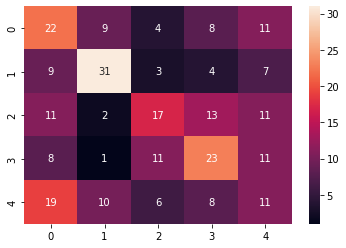

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

print(classification_report(y_test, y_predict))
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))
sns.heatmap(conf_mx, annot=True, fmt='')


## **accuracy -- loss**


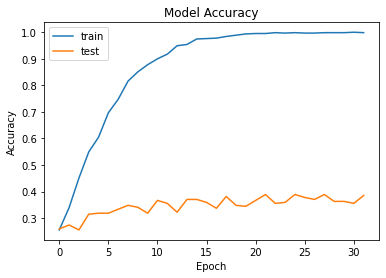

In [ ]:
# dictionary keys seems to have changed in version 2
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


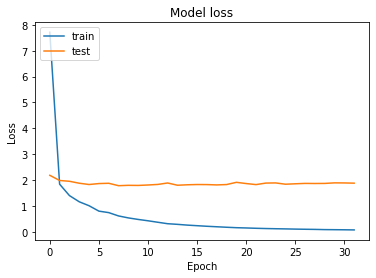

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## **Regularization for training classification**

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
for layer in vgg_model_transfer.layers:
    layer.trainable = False

x = vgg_model_transfer.layers[-1].output
# Flatten as before
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
# x = BatchNormalization()(x)
# x = Dense(300, activation='softmax')(x)

x = Dense(5, activation='softmax')(x)


vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
batchSize = 40
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_test, y_test_k))

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


16/16 [==============================] - 4s 234ms/step - loss: 1.9153 - accuracy: 0.2540 - val_loss: 1.6494 - val_accuracy: 0.2593
Epoch 2/32
16/16 [==============================] - 3s 215ms/step - loss: 1.9071 - accuracy: 0.2524 - val_loss: 1.6490 - val_accuracy: 0.2593
Epoch 3/32
16/16 [==============================] - 3s 216ms/step - loss: 1.8637 - accuracy: 0.2524 - val_loss: 1.6495 - val_accuracy: 0.2556
Epoch 4/32
16/16 [==============================] - 3s 214ms/step - loss: 1.8410 - accuracy: 0.2476 - val_loss: 1.6506 - val_accuracy: 0.2630
Epoch 5/32
16/16 [==============================] - 3s 212ms/step - loss: 1.8628 - accuracy: 0.2587 - val_loss: 1.6525 - val_accuracy: 0.2519
Epoch 6/32
16/16 [==============================] - 3s 212ms/step - loss: 1.8292 - accuracy: 0.2825 - val_loss: 1.6550 - val_accuracy: 0.2370
Epoch 7/32
16/16 [==============================] - 3s 213ms/step - loss: 1.8098 - accuracy: 0.2524 - val_loss: 1.6580 - val_accuracy: 0.2259
Epoch 8/32
16/16 

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
print(y_predict_prob)


y_predict = y_predict_prob.argmax(axis=-1)

[[0.24746388 0.24105562 0.21702422 0.12529814 0.16915806]
 [0.20578179 0.08882594 0.1710296  0.42359415 0.11076847]
 [0.31740624 0.28860375 0.15914954 0.1118041  0.12303639]
 ...
 [0.3284325  0.29303363 0.17778888 0.13032879 0.07041618]
 [0.1388671  0.19949245 0.09672461 0.11494896 0.44996697]
 [0.1170659  0.05150158 0.1497413  0.59047276 0.09121846]]


              precision    recall  f1-score   support

           0       0.31      0.43      0.36        54
           1       0.45      0.39      0.42        54
           2       0.15      0.04      0.06        54
           3       0.19      0.19      0.19        54
           4       0.15      0.24      0.19        54

    accuracy                           0.26       270
   macro avg       0.25      0.26      0.24       270
weighted avg       0.25      0.26      0.24       270

Confusion matrix: 
[[23  9  3  3 16]
 [10 21  3 14  6]
 [12  3  2 17 20]
 [ 9  3  3 10 29]
 [20 11  2  8 13]]


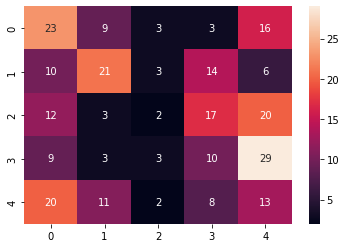

In [ ]:
print(classification_report(y_test, y_predict))
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))
sns.heatmap(conf_mx, annot=True, fmt='')


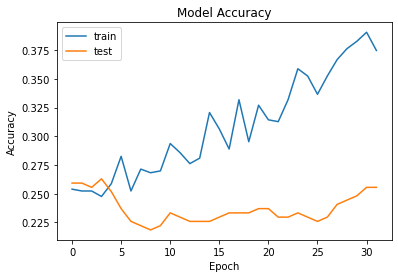

In [ ]:
# dictionary keys seems to have changed in version 2
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


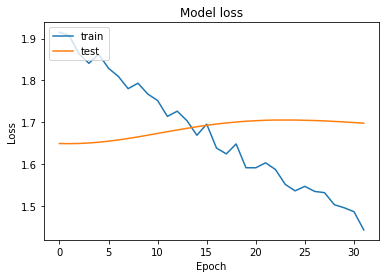

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## **data augmentation**

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
for layer in vgg_model_transfer.layers:
    layer.trainable = False

x = vgg_model_transfer.layers[-1].output
x=experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3))(x)
                                                              
x=experimental.preprocessing.RandomRotation(0.1)(x)
x=experimental.preprocessing.RandomZoom(0.1)(x)                                                           
x = Dense(5, activation='softmax')(x)


vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
batchSize = 40
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_test, y_test_k))

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
print(y_predict_prob)


y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
print(classification_report(y_test, y_predict))
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))
sns.heatmap(conf_mx, annot=True, fmt='')


In [ ]:
# dictionary keys seems to have changed in version 2
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# **regression**

## **DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
testing="/content/drive/MyDrive/Assignment3/testing"
training="/content/drive/MyDrive/Assignment3/training"

In [ ]:
from keras_preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from skimage import io
from skimage import color 
from skimage.transform import resize 
import os
import cv2
import numpy as np

train=os.walk(training)
train_images=[]
all_images=[]
num=0
for (root,dirs,files) in train:
        for file in files:
          x=os.path.join(root,file)
          img = io.imread(x)
          image_resized = resize(img, (32, 32))
          img1=image.img_to_array(image_resized)
          img1=np.expand_dims(img1, axis=0)          
          train_images.append(img1)
          all_images.append(x)


data= np.array(train_images)
print(data.shape) 
data= np.rollaxis(data,1,0)
print(data.shape)
data= data[0]
print(data.shape) 
  
print(len(train_images))
print(all_images)

labels=np.ones((data.shape[0],),dtype='int64')
labels[0:180]=0
labels[180:360]=1
labels[360:540]=2
labels[540:720]=3
labels[720:]=4

print(labels)


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import reshape


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))



In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


## **VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
 
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [ ]:
print(vgg_model.summary())

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.layers[-1].output
# x=Conv2D(7,(3,3),activation="relu",padding="same")(x)
# x = Dense(300, activation='relu')(x)
# x = Dense(255, activation='elu')(x)

x = Dense(1, activation='elu')(x)

vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

## **model fit**

**categorical_crossentropy**

In [ ]:
batchSize = 40
nEpochs = 10

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='mean_squared_error', 
                           optimizer=sgd, 
                           metrics=['mse'])


history = vgg_model_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_test, y_test))

## **confusion_matrix,classification_report**

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
# print(y_predict_prob)


y_predict = y_predict_prob.argmax(axis=-1)



## d

In [ ]:
# dictionary keys seems to have changed in version 2
import matplotlib.pyplot as plt

plt.plot(history.history["mse"])
plt.plot(history.history['val_'+"mse"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## **Regularization for training regrasion**

In [ ]:
print(vgg_model_transfer.summary())

In [ ]:
for layer in vgg_model_transfer.layers:
    layer.trainable = False

x = vgg_model_transfer.layers[-1].output
# Flatten as before
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
# x = BatchNormalization()(x)
# x = Dense(300, activation='softmax')(x)

x = Dense(5, activation='softmax')(x)


vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

In [ ]:
batchSize = 40
nEpochs = 10

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='mean_squared_error', 
                           optimizer=sgd, 
                           metrics=['mse'])


history = vgg_model_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_test, y_test))

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
print(y_predict_prob)


y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
print(classification_report(y_test, y_predict))
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))
sns.heatmap(conf_mx, annot=True, fmt='')


In [ ]:
# dictionary keys seems to have changed in version 2
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

